# Cleaning and Preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
df_train=pd.read_csv('train.csv')
df_train.shape

(550068, 12)

# Problem Statement
A retail company "ABC private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories.They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customers demographics (age,gender,marital status,city_type,stay_in_current_city),product details (product_id and product_category) and total purchase_amount from last month

Now they want to build a model to predict the purchase amount of customer against the products which will help them to create personalized offer for customer against different products

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# importing test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# Merge Both train and test data
df=df_train.append(df_test)
df.shape

(783667, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'],axis=1,inplace=True)

In [9]:
# Handling Categorical feature Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [12]:
df['Age'].head()

0    1
1    1
2    1
3    1
4    7
Name: Age, dtype: int64

In [13]:
# Second way to encode labels
#from sklearn import preprocessing

#label_encoder= preprocessing.LabelEncoder()
#df['Age']=label_encoder.fit_transform(df['Age'])

#df['Age'].unique()

In [14]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [15]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
df=pd.concat([df,df_city],axis=1)
df.drop('City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


# Handling Missing Values

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Replacing Missing Values

In [18]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [20]:
# Replacing Missing Values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
#Product Category 3 ----> Replacing missing values
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [23]:
# Replacing Missing Values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [24]:
df['Product_Category_3'].isnull().sum()

0

In [25]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\Hurera\AppData\Local\Temp/ipykernel_11420/2063355665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [28]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [29]:
#Convert Object into Integers
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualization of Age vs Purchase

#### Purchases of Men is observed higher then Women

C:\Users\Hurera\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

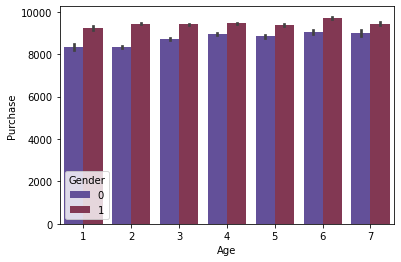

In [62]:
sns.barplot('Age','Purchase',hue='Gender',data=df,palette='twilight')

# Occupation vs Purchase 

C:\Users\Hurera\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

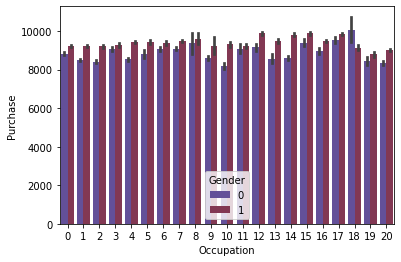

In [63]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df,palette='twilight')

# Product Categories vs Purchase

C:\Users\Hurera\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

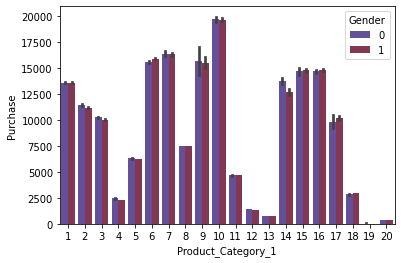

In [64]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df,palette='twilight')

C:\Users\Hurera\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

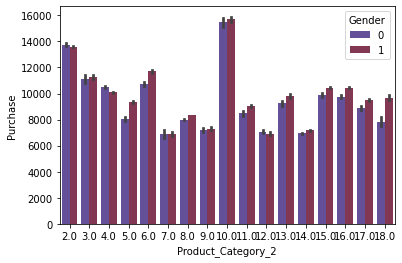

In [65]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df,palette='twilight')

C:\Users\Hurera\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

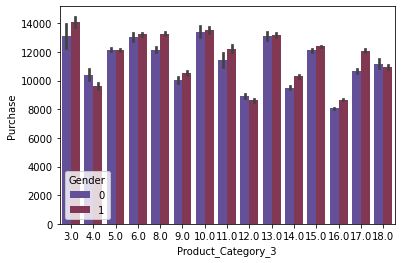

In [66]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df,palette='twilight')

# Correlation Heatmap

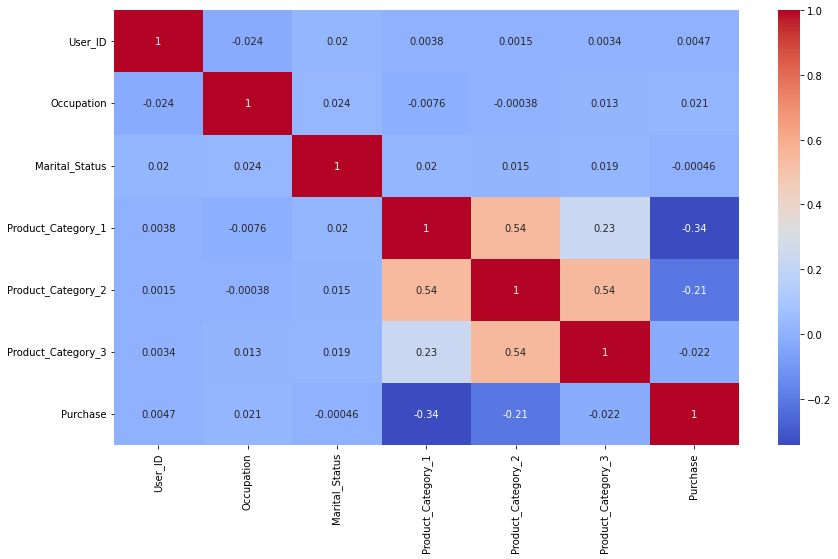

In [35]:
fig = plt.figure(figsize=(14,8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature Scaling

In [36]:
df_test= df[df['Purchase'].isnull()]
df_train= df[~df['Purchase'].isnull()]

In [37]:
print(df_test.shape)
print(df_train.shape)

(233599, 12)
(550068, 12)


In [38]:
X=df_train.drop('Purchase',axis=1)
print(X.shape)
X.head()

(550068, 11)


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [39]:
y=df_train['Purchase']
y.shape

(550068,)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(368545, 11)
(368545,)


In [41]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [42]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)


# Model Evaluation

In [44]:

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.12948768560712398

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3577.2377941856957

In [46]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mse

21939163.32153542

In [47]:
import math
rmse=math.sqrt(mse)
rmse

4683.9260585042775

# Random Forest

In [48]:
# Ready to Train the model

from sklearn.ensemble import RandomForestRegressor
#random_forrest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with X_train and y_test data
#random_forrest_regressor.fit(X_train, y_train)
Rand_FR = RandomForestRegressor(n_estimators=500, n_jobs=-1)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

# Visualization

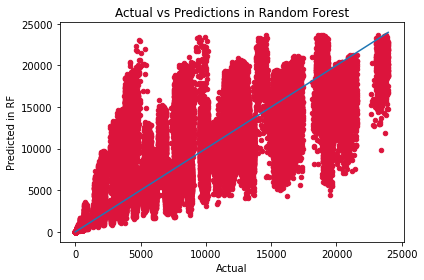

In [49]:
# Plot a scatter between predicted and actual
plt.scatter(y_test, y_pred_rf, s=20, c='crimson')
plt.title('Actual vs Predictions in Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted in RF')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

# Evaluation

In [50]:
# predicting the accuracy score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# score = sklearn.metrics.r2_score(y_test, y_pred_rf, sample_weight=None)
score=r2_score(y_test,y_pred_rf)
print('R2 socre is',score)
print('mean_sqrd_error is =',mean_squared_error(y_test,y_pred_rf))
print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

R2 socre is 0.6302038676391833
mean_sqrd_error is = 9319819.61587111
root_mean_squared error of is = 3052.8379609588046


# XGBoost

In [53]:
from xgboost import  XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(X_train, y_train)
ypred = xgbr.predict(X_test)


# Evaluation

In [57]:
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % (mse))
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 8393446.55
RMSE: 2897.14


In [56]:
score=r2_score(y_test,y_pred_rf)
print('R2 socre is',score)

R2 socre is 0.6302038676391833
